Подготовка данных из  методички 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

%matplotlib inline


__1__ Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log (как вариант - использовать np.clip или np.where).

In [2]:
def calc_logloss(y, y_pred):
    y_pred = y_pred.astype(float)
    for i in range(y_pred.shape[0]):
        if y_pred[i] <= 0:
            y_pred[i] = 0.001
        elif y_pred[i] >= 1:
            y_pred[i] = 0.999
    
    return - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))

In [3]:
# Проверяем
y = np.array([1, 0])

y_pred1 = np.array([0, 1])
y_pred2 = np.array([1, 0])

calc_logloss(y, y_pred1), calc_logloss(y, y_pred2)

(6.907755278982137, 0.0010005003335835344)

__2__ Подберите аргументы функции eval_LR_model для логистической регрессии таким образом, чтобы log loss был минимальным. Покажите влияние гиперпараметров на ошибку алгоритма (оптимально здесь использовать критерий остановки обучения).

In [4]:
X = np.array([[1, 0, 1, 3, 5, 0, 1, 1, 1, 1],
              [1, 1, 2, 7, 3, 0, 5, 8, 3, 2],
              [500, 756, 750, 600, 1450,
               400, 1580, 1900, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [5]:
def calc_std_feat(x):
    x[1:] = ((x[1:].T - x[1:].mean(axis=1)) / x[1:].std(axis=1)).T
    return x

In [6]:
standart_X = calc_std_feat(X)
standart_X

array([[ 1.        ,  0.        ,  1.        ,  3.        ,  5.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.87235674, -0.87235674, -0.47583095,  1.50679801, -0.07930516,
        -1.26888254,  0.71374643,  1.90332381, -0.07930516, -0.47583095],
       [-0.87619533, -0.36478173, -0.37676799, -0.6764244 ,  1.02162858,
        -1.07596627,  1.2813308 ,  1.9205978 , -0.9760808 ,  0.12265936],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

def eval_LR_model(X, y, iterations, alpha=1e-4):
    
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errors = []
    
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        
        errors.append(err)
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    
    errors = np.array(errors)
    
    return W, errors

In [8]:
model, error_eval = eval_LR_model(
                X=standart_X,
                y=y,
                iterations=8000,
                alpha=1e-1)
error_eval


800 [ 0.44926841 -0.98727297 -1.57361442  2.84276243] 0.4405463928617411
1600 [ 0.5235159  -0.96103879 -2.47512079  3.76932495] 0.41910677494008963
2400 [ 0.57727433 -0.95621726 -3.04913986  4.37952545] 0.4101914962686809
3200 [ 0.61770463 -0.95619211 -3.45884913  4.82239882] 0.40558614167907747
4000 [ 0.64936366 -0.95747151 -3.77086121  5.16298815] 0.40289213572438287
4800 [ 0.67492443 -0.95909542 -4.01846838  5.43501817] 0.40118551309821787
5600 [ 0.69603699 -0.96074793 -4.22060994  5.65810757] 0.40004322947834375
6400 [ 0.71377955 -0.96231772 -4.38906095  5.84464062] 0.39924741926226487
7200 [ 0.72889177 -0.96376794 -4.53163202  6.00292344] 0.3986759189541452
8000 [ 0.7419017  -0.96509096 -4.65376565  6.13879292] 0.3982556799491089


array([0.74169732, 0.7301908 , 0.71903645, ..., 0.39825658, 0.39825613,
       0.39825568])

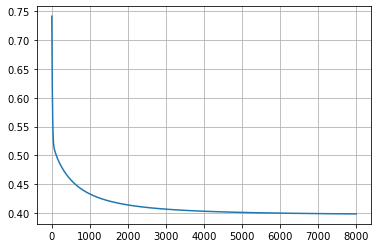

In [9]:
plt.plot(range(error_eval.shape[0]),error_eval)

plt.grid()
plt.show()

log_loss минимален при alpha = 1e-1 и количестве итераций = 8000

__3__ Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred_proba).

In [10]:
cals_pred_proba = lambda X, W: 1 / (1 + np.exp(-np.dot(X, W)))

In [11]:
# Результаты
cals_pred_proba(model[1], standart_X)


array([[0.27586006, 0.5       , 0.27586006, 0.05238774, 0.00795905,
        0.5       , 0.27586006, 0.27586006, 0.27586006, 0.27586006],
       [0.69886599, 0.69886599, 0.61282916, 0.18935646, 0.51912484,
        0.77286978, 0.33429335, 0.13742064, 0.51912484, 0.61282916],
       [0.69964505, 0.58711402, 0.58991533, 0.65764365, 0.2717099 ,
        0.7385422 , 0.22502823, 0.13545644, 0.71950484, 0.47044015],
       [0.70369812, 0.70369812, 0.40837148, 0.70369812, 0.40837148,
        0.70369812, 0.16709264, 0.16709264, 0.70369812, 0.40837148]])

__4__ Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются значения признаков Х и веса, которые уже посчитаны функцией eval_LR_model, на выходе - массив y_pred).

In [12]:
def calc_pred(X, W):
    
    y_pred = cals_pred_proba(X, W)

    for i in range(y_pred.shape[0]):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

In [13]:
cp =calc_pred(model, standart_X)
cp

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1.])

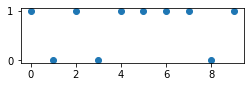

In [14]:
plt.figure(figsize=(4,1))
plt.scatter(range(cp.shape[0]), cp)
plt.show()

__5__ Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [15]:
# accuracy
accuracy = lambda y, y_pred: (y_pred == y).sum()/cp.shape[0]

In [16]:
accuracy(y=y, y_pred=cp)

0.6

In [17]:
# матрица ошибок
def error_matrix(y, y_pred):
    
    TP = y * y_pred
    FP = y_pred - TP
    FN = y - TP
    TN = y**0 - TP - FP - FN
    
    return np.array([[TP.sum(), FP.sum()], 
                     [FN.sum(), TN.sum()]])

In [18]:
em = error_matrix(y=y, y_pred=cp)
em

array([[4., 3.],
       [1., 2.]])

In [19]:
# точность 
precision = lambda em: em[0,0]/(em[0,0]+em[0,1])

In [20]:
precision(em)

0.5714285714285714

In [21]:
# Полнота
recall = lambda em: em[0,0]/(em[0,0]+em[1,0])

In [22]:
recall(em)

0.8

In [23]:
# F1 score
def F1_score(em):
    pre = precision(em)
    rec = recall(em)
    return (2*pre*rec)/(pre+rec)

In [24]:
F1_score(em)

0.6666666666666666

__6__ Могла ли модель переобучиться? Почему?

__Ответ__:
    Могла: не использовали L1 или L2 регуляции